Data Dictionary

TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)

avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)

avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)

incidenceRate: Mean per capita (100,000) cancer diagoses(a)

medianIncome: Median income per county (b)

popEst2015: Population of county (b)

povertyPercent: Percent of populace in poverty (b)

studyPerCap: Per capita number of cancer-related clinical trials per county (a)

binnedInc: Median income per capita binned by decile (b)

MedianAge: Median age of county residents (b)

MedianAgeMale: Median age of male county residents (b)

MedianAgeFemale: Median age of female county residents (b)

Geography: County name (b)

AvgHouseholdSize: Mean household size of county (b)

PercentMarried: Percent of county residents who are married (b)

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)

PctPrivateCoverage: Percent of county residents with private health coverage (b)

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)

PctPublicCoverage: Percent of county residents with government-provided health coverage (b)

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)

PctWhite: Percent of county residents who identify as White (b)

PctBlack: Percent of county residents who identify as Black (b)

PctAsian: Percent of county residents who identify as Asian (b)

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

PctMarriedHouseholds: Percent of married households (b)

BirthRate: Number of live births relative to number of women in county (b)

(a): years 2010-2016

(b): 2013 Census Estimates




# First try with Linear regression. Then try with ridge,lasso and elastic regression to find if you can optimize the model. Good luck!

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix   
%matplotlib inline

In [33]:
data = pd.read_csv('cancer_reg.csv',encoding='ISO-8859-1')
# Output exceeds the size limit. Open the full output data in a text editor

In [35]:
data.shape

(3047, 34)

In [36]:
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [38]:
# finding the columnns containing only object type data

data.select_dtypes(include=['object']).columns

Index(['binnedInc', 'Geography'], dtype='object')

In [39]:
# dropping the columns containing only object type data

data.drop(data.select_dtypes(include=['object']).columns, axis=1, inplace=True)


In [40]:

data.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [41]:
# finding columns containing null values with the counting of null values in the data

data.isnull().sum()[data.isnull().sum()>0]


PctSomeCol18_24            2285
PctEmployed16_Over          152
PctPrivateCoverageAlone     609
dtype: int64

In [42]:
# Treating the null values in the data containing columns of "PctSomeCol18_24", "PctEmployed16_Over", "PctPrivateCoverageAlone"

data['PctSomeCol18_24'].fillna(data['PctSomeCol18_24'].mean(), inplace=True)

data['PctEmployed16_Over'].fillna(data['PctEmployed16_Over'].mean(), inplace=True)

data['PctPrivateCoverageAlone'].fillna(data['PctPrivateCoverageAlone'].mean(), inplace=True)

data.isnull().sum()[data.isnull().sum()>0]



Series([], dtype: int64)

In [43]:
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,48.453774,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,53.800000,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,43.500000,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,40.300000,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,43.900000,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


<AxesSubplot:>

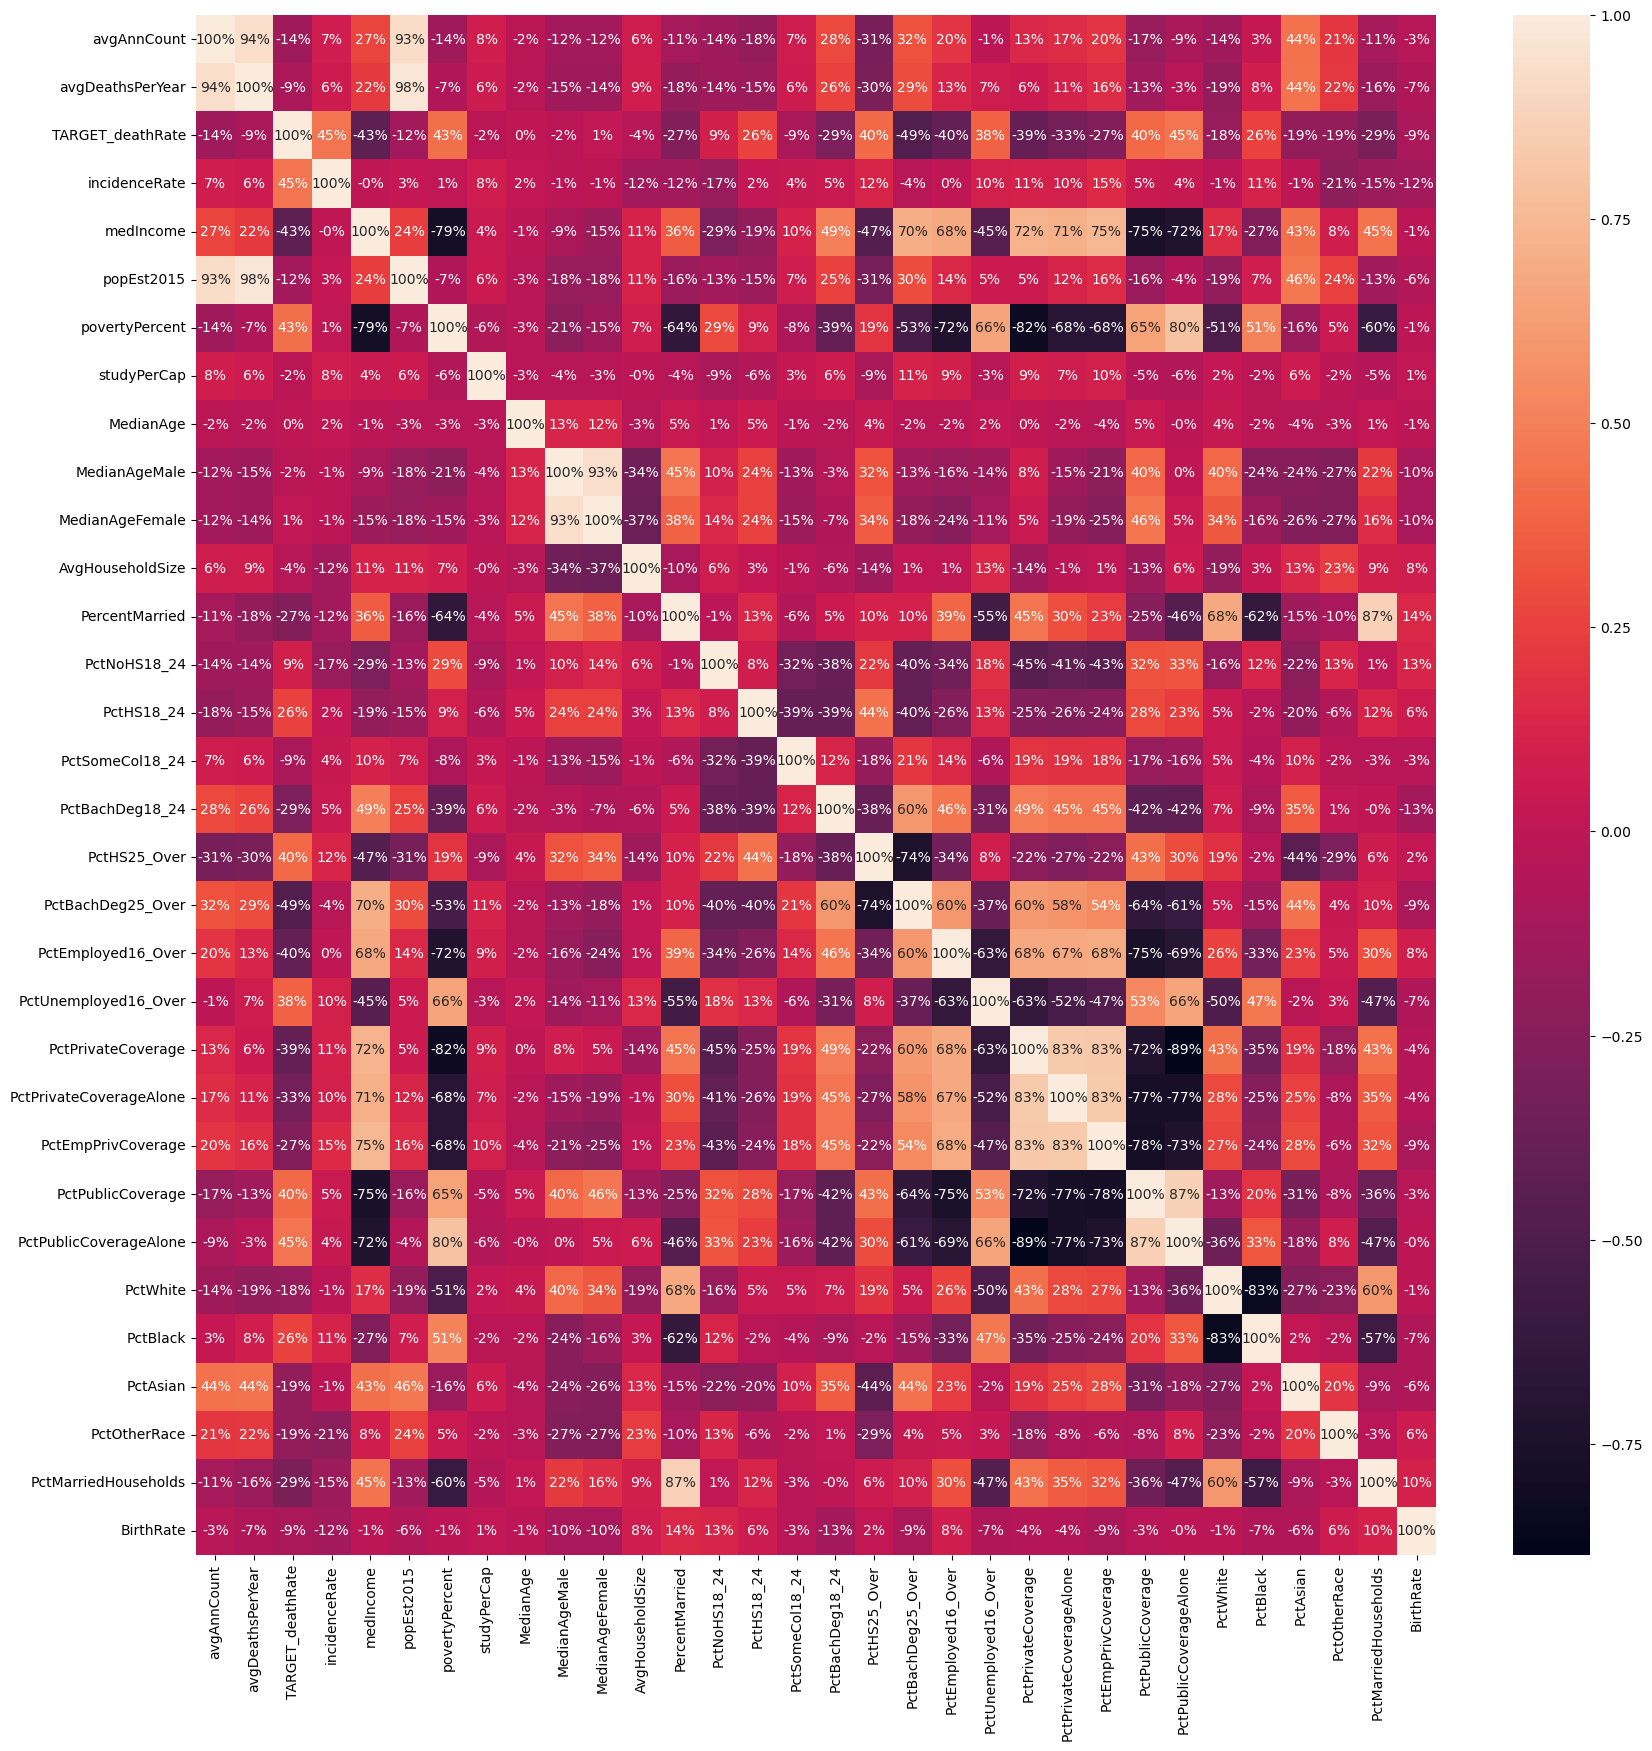

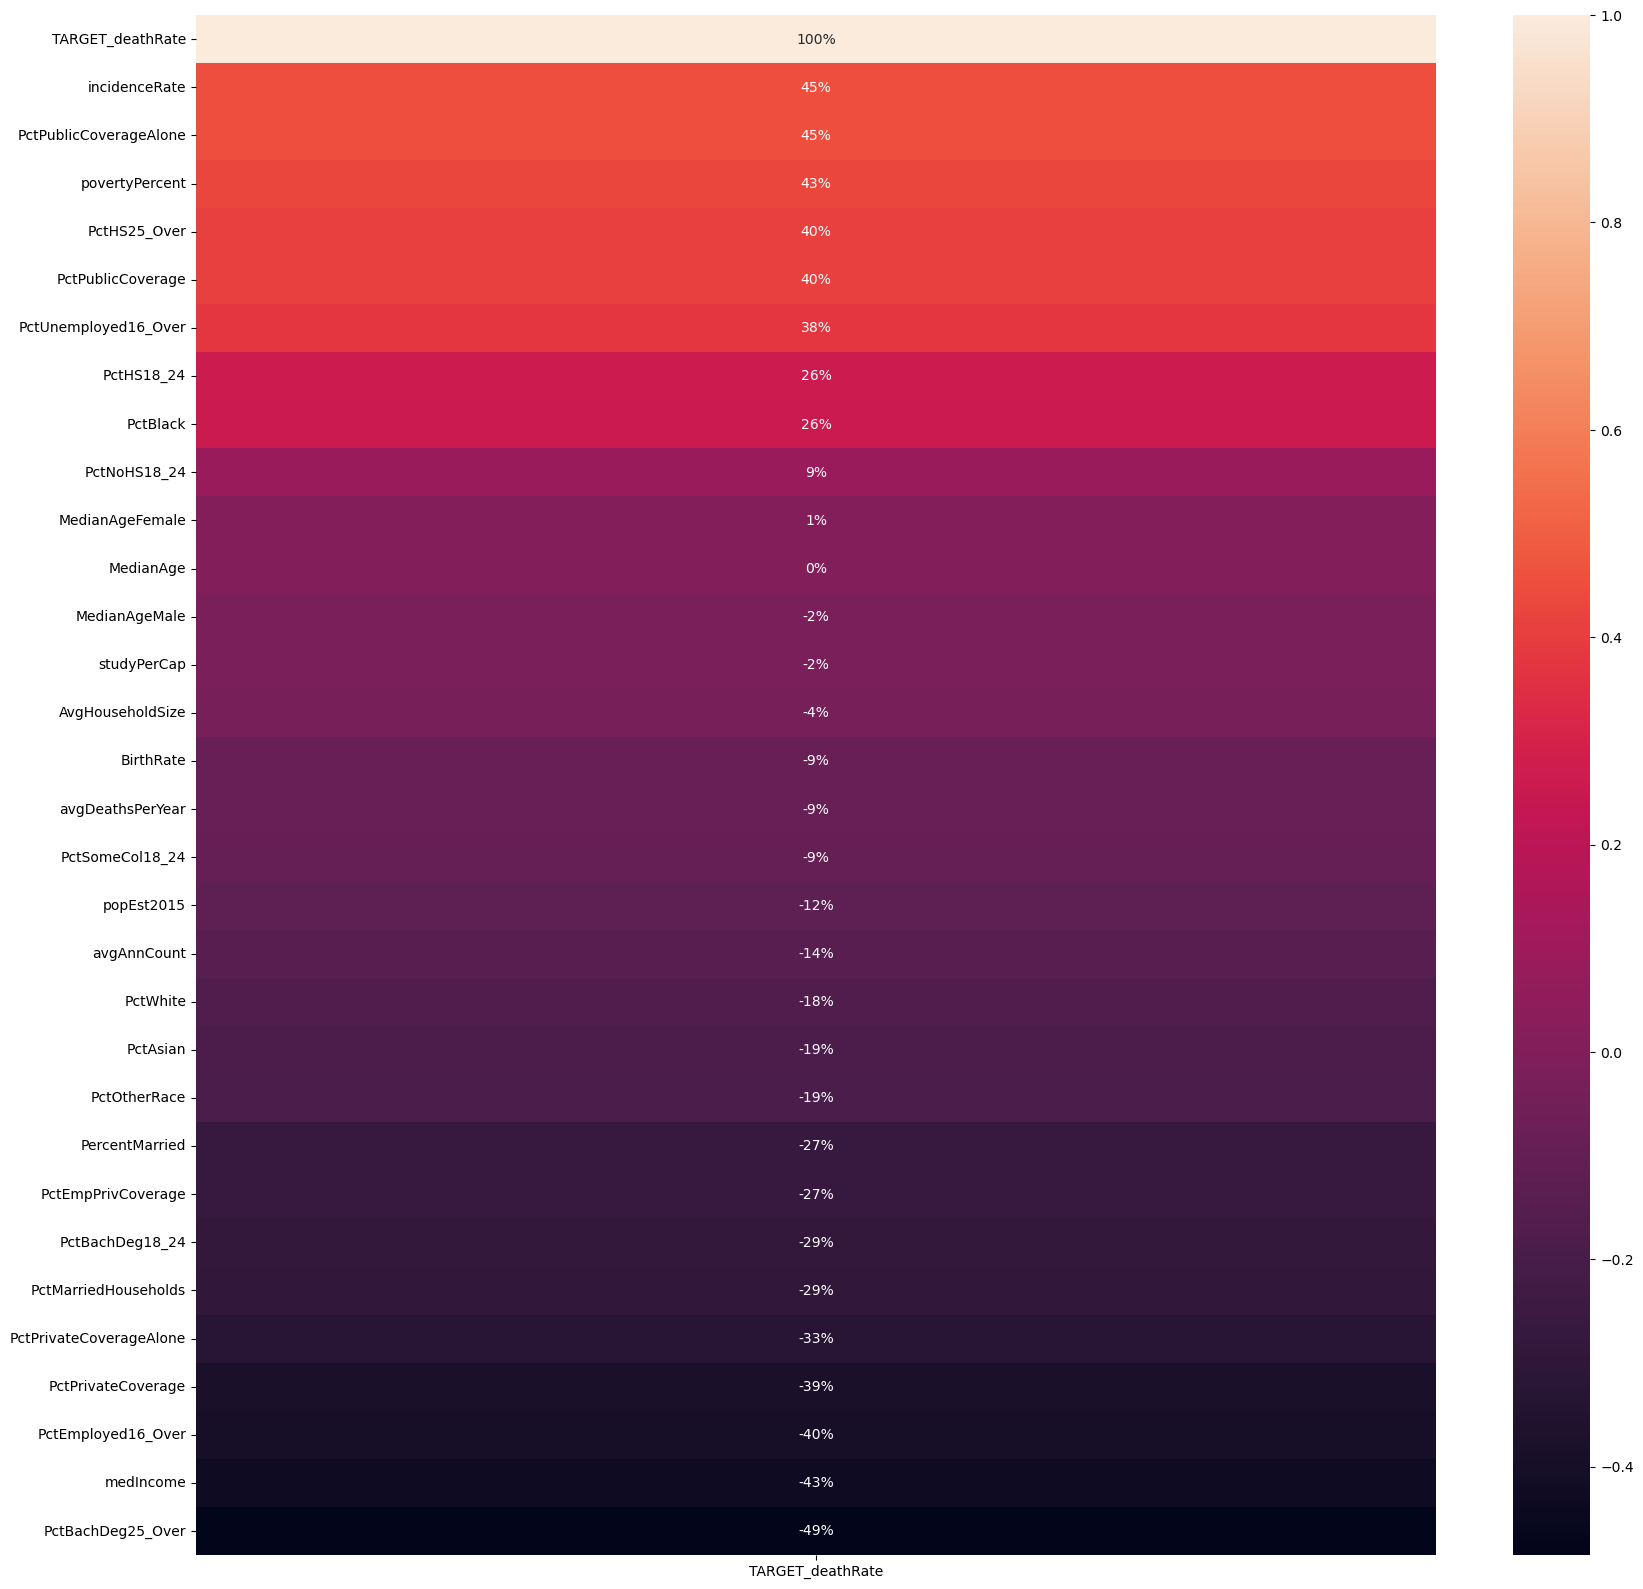

In [44]:
# finding the correlation between the columns

data.corr()

# plotting the correlation between the columns

plt.figure(figsize=(20,20))

sns.heatmap(data.corr(), annot=True, fmt='.0%')

# finding the correlation between the columns and the target column

data.corr()['TARGET_deathRate'].sort_values(ascending=False)

# plotting the correlation between the columns and the target column

plt.figure(figsize=(20,20))

sns.heatmap(data.corr()[['TARGET_deathRate']].sort_values(by='TARGET_deathRate', ascending=False), annot=True, fmt='.0%')





In [45]:
# Split your data into a training set and a testing set 

from sklearn.model_selection import train_test_split

X = data.drop('TARGET_deathRate',axis=1)

y = data['TARGET_deathRate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


In [46]:
# linear regression model

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

# The coefficients

print('Coefficients: \n', lm.coef_)

# The mean squared error

print("Mean squared error: %.2f"

        % np.mean((lm.predict(X_test) - y_test) ** 2))

# Explained variance score: 1 is perfect prediction

print('Variance score: %.2f' % lm.score(X_test, y_test))

# Plot outputs

Coefficients: 
 [-4.18463730e-03  1.93923526e-02  2.01152887e-01  2.03512428e-04
 -1.45146248e-05  6.13328848e-01 -7.85332124e-06  4.20957974e-03
 -6.57732824e-01  5.86774976e-03  1.58449940e+00  1.37637014e+00
 -1.54988222e-01  1.59451766e-01 -3.79469802e-02 -2.83294263e-02
  3.71484408e-01 -1.25221245e+00 -4.75083408e-01 -1.04839088e-01
 -5.64304910e-01  1.19281059e-01  2.91365744e-01 -1.76093219e-01
  2.52811008e-01 -9.26603302e-02 -5.37963951e-03 -2.02566935e-01
 -9.02028589e-01 -1.26170165e+00 -9.54766333e-01]
Mean squared error: 361.62
Variance score: 0.54


In [47]:

# Training the ridge regression model


from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, normalize=True)

ridge.fit(X_train,y_train)

ridge_pred = ridge.predict(X_test)

c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [19]:
# finding accuracy of the model

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, ridge_pred))

print('MSE:', metrics.mean_squared_error(y_test, ridge_pred))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))

print('R2:', metrics.r2_score(y_test, ridge_pred))

MAE: 13.994321517408714
MSE: 361.5810937762615
RMSE: 19.01528579265275
R2: 0.5385288071792604


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}

grid = GridSearchCV(Ridge(),param_grid,refit=True,verbose=2)

grid.fit(X_train,y_train)

grid.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ........................................

{'alpha': 1000.0}

In [21]:
grid.best_estimator_

Ridge(alpha=1000.0)

In [22]:
grid.best_score_

0.4870818404386569

In [23]:
grid_pred = grid.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, grid_pred))

print('MSE:', metrics.mean_squared_error(y_test, grid_pred))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_pred)))

print('R2:', metrics.r2_score(y_test, grid_pred))

MAE: 13.865179742350161
MSE: 360.1701603489404
RMSE: 18.9781495501785
R2: 0.5403295239282933


In [24]:

# Training the lasso regression model

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=True)

lasso.fit(X_train,y_train)

lasso_pred = lasso.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, lasso_pred))

print('MSE:', metrics.mean_squared_error(y_test, lasso_pred))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

print('R2:', metrics.r2_score(y_test, lasso_pred))



MAE: 16.032455188551342
MSE: 449.57850630455704
RMSE: 21.203266406489284
R2: 0.4262213009972621


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [25]:
# Tuning the model using GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(Lasso(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid.best_score_


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ........................................

0.4859143657297563

In [26]:

grid_pred = grid.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, grid_pred))

print('MSE:', metrics.mean_squared_error(y_test, grid_pred))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_pred)))

print('R2:', metrics.r2_score(y_test, grid_pred))



MAE: 13.866028889349938
MSE: 360.7207317730672
RMSE: 18.992649414262015
R2: 0.5396268520900859


In [27]:
# Training the elastic net regression model

from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=0.1, normalize=True)

elasticnet.fit(X_train,y_train)

elasticnet_pred = elasticnet.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, elasticnet_pred))

print('MSE:', metrics.mean_squared_error(y_test, elasticnet_pred))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elasticnet_pred)))

print('R2:', metrics.r2_score(y_test, elasticnet_pred))

MAE: 20.95129867119509
MSE: 757.9796214002184
RMSE: 27.531429701347122
R2: 0.03262154453846755


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


In [28]:
# Tuning the model using GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(ElasticNet(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ........................................

0.486725549451687

In [29]:
grid_pred = grid.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, grid_pred))

print('MSE:', metrics.mean_squared_error(y_test, grid_pred))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_pred)))

print('R2:', metrics.r2_score(y_test, grid_pred))

MAE: 13.91152556250987
MSE: 360.2708421280043
RMSE: 18.98080193585098
R2: 0.5402010278827875


In [30]:
# Training the XG Boost regression model

from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train,y_train)

xgb_pred = xgb.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, xgb_pred))

print('MSE:', metrics.mean_squared_error(y_test, xgb_pred))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

print('R2:', metrics.r2_score(y_test, xgb_pred))



c:\Users\user\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


MAE: 12.750675192244067
MSE: 315.1976391263299
RMSE: 17.75380632783657
R2: 0.5977261173065851


In [31]:
# Tuning the model using GridSearchCV

param_grid = {  'n_estimators': [100, 500],

                'learning_rate': [0.01, 0.1],

                'max_depth': [3, 4],

                'min_child_weight': [1, 3],

                'gamma': [0.0, 0.2 ],

                'subsample': [0.6, 0.8],

                'colsample_bytree': [0.6, 0.7],

                'reg_alpha': [1e-5, 0.1]}

grid = GridSearchCV(XGBRegressor(),param_grid,refit=True,verbose=2, n_jobs=-1)


grid.fit(X_train,y_train)

grid.best_params_

grid.best_estimator_

grid.best_score_

grid_pred = grid.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, grid_pred))

print('MSE:', metrics.mean_squared_error(y_test, grid_pred))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_pred)))

print('R2:', metrics.r2_score(y_test, grid_pred))



Fitting 5 folds for each of 256 candidates, totalling 1280 fits


c:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


MAE: 11.28798541960169
MSE: 255.0060999092484
RMSE: 15.968910417096353
R2: 0.6745461222192604


In [48]:
grid.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 500,
 'reg_alpha': 1e-05,
 'subsample': 0.8}